## Question 1

As a senior backend engineer at Jovian, you are tasked with developing a fast in-memory data structure to manage profile information (username, name and email) for 100 million users. It should allow the following operations to be performed efficiently:
1. __Insert__ the profile information for a new user.
2. __Find__ the profile information of a user, given the username.
3. __Update__ the profile information of a user, given their username.
4. __List__ all the users of the platform, sorted by username

You can assume that usernames are unique

In [1]:
class User:
    def __init__(self, username, name, email):
        self.username = username
        self.name = name
        self.email = email
    
    def __repr__(self):
        return f"User (username: {self.username}, name: {self.name}, email: {self.email})"

    def __str__(self):
        return self.__repr__()

In [2]:
user1 = User("Jane228", "Jane", "Ja@mail.com")
user1

User (username: Jane228, name: Jane, email: Ja@mail.com)

In [3]:
josh = User("josh", "Josh Wa", "jo@mail.com")
mikki = User("mikki", "Mikle St", 'mike@mail.com')
kiki = User("kiki", "Kyle But", "bhg@mail.com")
ceee = User("ceee", "Guf Kjf", "ce@mail.com")
yter = User("yter", "Haj Ljsd", "yt@mail.com")
astr = User("astr", "Aaron Ku", "a@mail.com")
jjjj = User("jjjj", "Ilcher Uuu", "ilcher@mail.com")

In [4]:
users = [josh, mikki, kiki, ceee, yter, astr, jjjj]
users

[User (username: josh, name: Josh Wa, email: jo@mail.com),
 User (username: mikki, name: Mikle St, email: mike@mail.com),
 User (username: kiki, name: Kyle But, email: bhg@mail.com),
 User (username: ceee, name: Guf Kjf, email: ce@mail.com),
 User (username: yter, name: Haj Ljsd, email: yt@mail.com),
 User (username: astr, name: Aaron Ku, email: a@mail.com),
 User (username: jjjj, name: Ilcher Uuu, email: ilcher@mail.com)]

In [5]:
class UserDatabase:
    def __init__(self):
        self.users = []

    def insert(self, user):
        i = 0

        while i < len(self.users):
            if self.users[i].username > user.username:
                break
            i += 1
        self.users.insert(i, user)

    def find(self, username):
        for user in self.users:
            if user.username == username:
                return user

    def update(self, user):
        target = self.find(user.username)
        target.name, target.email = user.name, user.email

    def list_all(self):
        return self.users

In [6]:
database = UserDatabase()

In [7]:
database.insert(josh)
database.insert(mikki)
database.insert(kiki)

In [8]:
user = database.find('kiki')
user

User (username: kiki, name: Kyle But, email: bhg@mail.com)

In [9]:
database.update(User(username='kiki', name='Al Al', email='aaa@aaa.com'))

In [10]:
user = database.find('kiki')
user

User (username: kiki, name: Al Al, email: aaa@aaa.com)

In [11]:
database.list_all()

[User (username: josh, name: Josh Wa, email: jo@mail.com),
 User (username: kiki, name: Al Al, email: aaa@aaa.com),
 User (username: mikki, name: Mikle St, email: mike@mail.com)]

In [12]:
database.insert(astr)

In [13]:
database.list_all()

[User (username: astr, name: Aaron Ku, email: a@mail.com),
 User (username: josh, name: Josh Wa, email: jo@mail.com),
 User (username: kiki, name: Al Al, email: aaa@aaa.com),
 User (username: mikki, name: Mikle St, email: mike@mail.com)]

## Question 2

Implement a binary tree using Python, and show its usage with some examples

In [14]:
class TreeNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

In [15]:
node0 = TreeNode(3)
node1 = TreeNode(4)
node2 = TreeNode(5)

In [16]:
node0.key

3

In [17]:
node0.left = node1
node0.right = node2

In [18]:
tree = node0

In [19]:
tree.key

3

In [20]:
tree.left.key

4

## Exercise

Create the following binary tree using the class __TreeNode__ defined above.

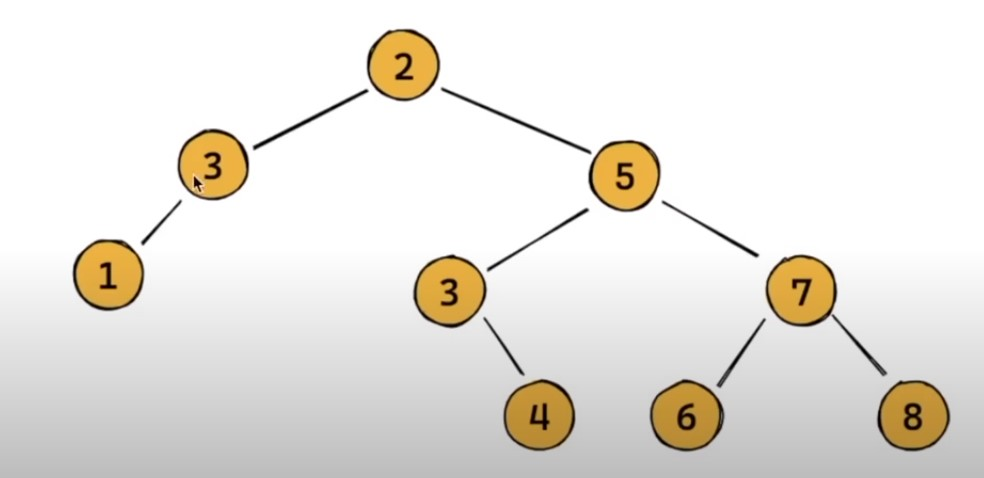

In [21]:
tree_tuple = ((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))

In [22]:
def parse_tuple(data):

    if isinstance(data, tuple) and len(data) == 3:
        node = TreeNode(data[1])
        node.left = parse_tuple(data[0])
        node.right = parse_tuple(data[2])
    elif data == None:
        node = None
    else:
        node = TreeNode(data)
    return node

In [23]:
tree2 = parse_tuple(tree_tuple)

In [24]:
tree2.key

2

In [25]:
tree2.left.key, tree2.right.key

(3, 5)

## Exercise

Develop a function that converts node into tuple

In [26]:
def tree_to_tuple(node):

    if node is None:
        return None
    
    tup = (tree_to_tuple(node.left), node.key, tree_to_tuple(node.right))

    return tup

In [27]:
result = tree_to_tuple(tree2)
result


(((None, 1, None), 3, None),
 2,
 ((None, 3, (None, 4, None)), 5, ((None, 6, None), 7, (None, 8, None))))

Function to visualize a tree:

In [28]:
def display_keys(node, space='\t', level=0):

    if node == None:
        print(space*level + "x")
        return
    
    if node.left == None and node.right == None:
        print(space*level + str(node.key))
        return
    
    display_keys(node.right, space, level + 1)
    print(space*level + str(node.key))
    display_keys(node.left, space, level + 1)


In [29]:
result = display_keys(tree2)

			8
		7
			6
	5
			4
		3
			x
2
		x
	3
		1


# Traversing a binary tree

## Question

Write a function to perform the _inorder_ traversal of a binary tree

A _traversal_ refers to the process of visiting each node of a tree exactly once. Visiting a node generally refers to adding th node's key to a list. There are three ways to traverse a binary tree and return the list of visited keys:

### Inorder traversal

1. Traverse the left subtree recursively inorder
2. Traverse the current node
3. Traverse the right subtree recursively inorder

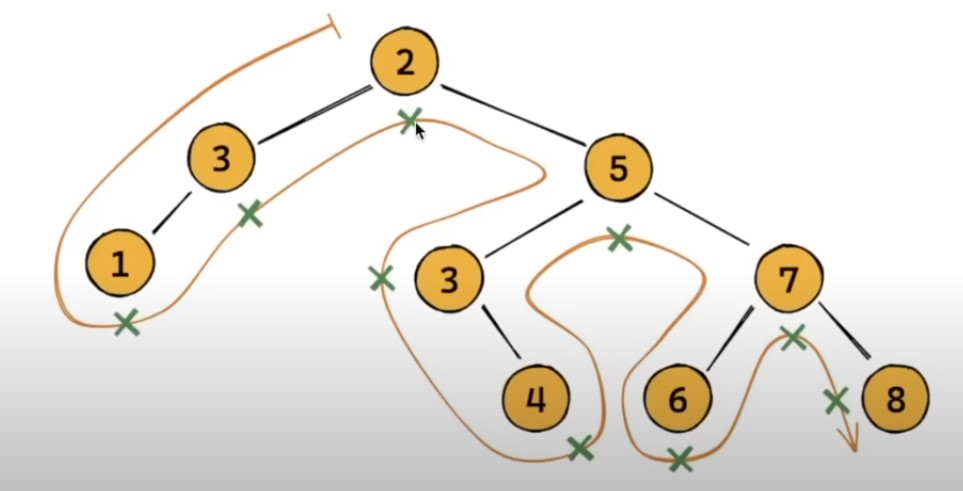

### Preorder traversal

1. Traverse the current node
2. Traverse the left tree recursively preorder
3. Traverse the right tree recursively preorder

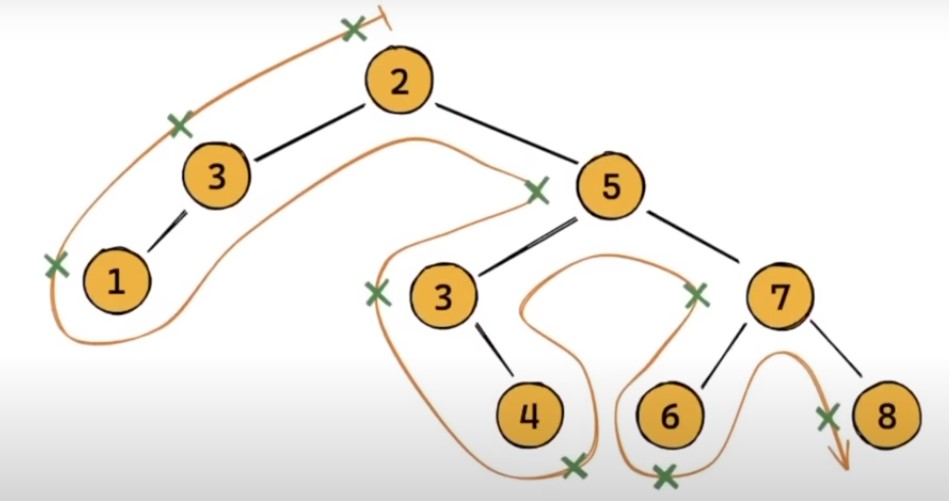

Here is an implementation of __inorder traversal__

In [30]:
def traversal_inorder(node):
    if node == None:
        return []
    return (traversal_inorder(node.left) + [node.key] + traversal_inorder(node.right))

In [31]:
traversal_inorder(tree2)

[1, 3, 2, 3, 4, 5, 6, 7, 8]

Here is the implementation of __preorder traversal__.

In [32]:
def traversal_preorder(node):
    if node == None:
        return []
    return ([node.key] + traversal_preorder(node.left) + traversal_preorder(node.right))

In [33]:
traversal_preorder(tree2)

[2, 3, 1, 5, 3, 4, 7, 6, 8]

Here is the implementation of __postorder traversal__

In [34]:
def traversal_postorder(node):
    if node == None:
        return []
    return (traversal_postorder(node.left) + traversal_postorder(node.right) + [node.key])

In [35]:
traversal_postorder(tree2)

[1, 3, 4, 3, 6, 8, 7, 5, 2]

# Height and Size of a Binary Tree

## Question

Write a function to calculate the height/depth of a binary tree

Write a function to count the number of nodes of a binary tree

In [36]:
def tree_height(node):
    if node == None:
        return 0
    return 1 + max(tree_height(node.left), tree_height(node.right))

In [37]:
tree_height(tree2)

4

In [38]:
def tree_size(node):
    if node is None:
        return 0
    return 1 + tree_size(node.left) + tree_size(node.right)

In [39]:
tree_size(tree2)

9

## Binary Search Tree (BST)

A __binary search tree__ is a tree that satisfies following conditions:
1. The left subtree of any node only contains nodes with keys less than the node's key
2. The right subtree of any node only contains nodes with keys greater than the node's key

### Exercise

Write a function to check if a binary tree is a binary search tree (BST)

In [40]:
def remove_none(nums):
    return [x for x in nums if x is not None]

def is_bst(node):
    if node is None:
        return True, None, None
    
    bst_l, min_l, max_l = is_bst(node.left)
    bst_r, min_r, max_r = is_bst(node.right)

    is_bst_node = (bst_l and bst_r and (max_l is None or max_l < node.key) and (min_r is None or min_r > node.key))

    min_node = min(remove_none([min_r, node.key, min_l]))
    max_node = max(remove_none([max_l, node.key, max_r]))

    return is_bst_node, min_node, max_node

In [41]:
is_bst(tree2)

(False, 1, 8)

In [45]:
class BSTNode:
    def __init__(self, key, value=None):
        self.key = key
        self.value = value
        self.left = None
        self.right = None
        self.parent = None

In [46]:
tree = BSTNode(josh.username, josh)

In [48]:
tree.key, tree.value

('josh', User (username: josh, name: Josh Wa, email: jo@mail.com))

In [49]:
tree.left = BSTNode(mikki.username, mikki)
tree.left.parent = tree
tree.right = BSTNode(kiki.username, kiki)
tree.right.parent = tree

In [57]:
tree.left.left = BSTNode(ceee.username, ceee)
tree.left.left.parent = tree.left
tree.left.right = BSTNode(yter.username, yter)
tree.left.right.parent = tree.left

In [59]:
tree.right.left = BSTNode(astr.username, astr)
tree.right.left.parent = tree.right
tree.right.right = BSTNode(jjjj.username, jjjj)
tree.right.right.parent = tree.right

In [60]:
display_keys(tree)

		jjjj
	kiki
		astr
josh
		yter
	mikki
		ceee


### Exercise

Write a function to insert a new node into a BST

In [61]:
def insert(node, key, value):
    if node is None:
        node = BSTNode(key, value)
    elif key < node.key:
        node.left = insert(node.left, key, value)
        node.left.parent = node
    elif key > node.key:
        node.right = insert(node.right, key, value)
        node.right.parent = node
    return node

In [62]:
tree = insert(None, josh.username, josh)

In [ ]:
# josh = User("josh", "Josh Wa", "jo@mail.com")
# mikki = User("mikki", "Mikle St", 'mike@mail.com')
# kiki = User("kiki", "Kyle But", "bhg@mail.com")
# ceee = User("ceee", "Guf Kjf", "ce@mail.com")
# yter = User("yter", "Haj Ljsd", "yt@mail.com")
# astr = User("astr", "Aaron Ku", "a@mail.com")
# jjjj = User("jjjj", "Ilcher Uuu", "ilcher@mail.com")

In [64]:
insert(tree, mikki.username, mikki)
insert(tree, kiki.username, kiki)
insert(tree, ceee.username, ceee)
insert(tree, yter.username, yter)
insert(tree, astr.username, astr)
insert(tree, jjjj.username, jjjj)

In [65]:
display_keys(tree)

		yter
	mikki
		kiki
josh
		jjjj
	ceee
		astr


Let us write function called _find_ to search for a person in a tree

In [66]:
def find(node, key):
    if node is None:
        return None
    if key == node.key:
        return node
    if key < node.key:
        return find(node.left, key)
    if key > node.key:
        return find(node.right, key)

In [74]:
res = find(tree, 'jjj')
print(res)


None


### Exercise

Write a function to update the value associated with a given key within a BST

In [75]:
def update(node, key, value):
    target = find(node, key)
    if target is not None:
        target.value = value

In [76]:
update(tree, 'jjjj', User('none', 'none', 'none'))

### Exercise

Write a function to retrieve all the key-values pairs stored in a BST in the sorted order of keys

In [80]:
def list_all(node):
    if node is None:
        return []
    return list_all(node.left) + [node.key, node.value] + list_all(node.right)

In [81]:
list_all(tree)

['astr',
 User (username: astr, name: Aaron Ku, email: a@mail.com),
 'ceee',
 User (username: ceee, name: Guf Kjf, email: ce@mail.com),
 'jjjj',
 User (username: none, name: none, email: none),
 'josh',
 User (username: josh, name: Josh Wa, email: jo@mail.com),
 'kiki',
 User (username: kiki, name: Al Al, email: aaa@aaa.com),
 'mikki',
 User (username: mikki, name: Mikle St, email: mike@mail.com),
 'yter',
 User (username: yter, name: Haj Ljsd, email: yt@mail.com)]

## Balanced Binary Trees

### Exercise

Write a function to determine whether a binary tree is balanced

Here is a ecursive startegy:
1. Ensure that the left subtree is balanced
2. Ensure that the right subtree is balanced
3. Ensure that the difference between the heights of the left and the right subtrees is not higher than 1

In [84]:
def is_balanced(node):
    if node is None:
        return True, 0
    balanced_l, height_l = is_balanced(node.left)
    balanced_r, height_r = is_balanced(node.right)

    balanced = balanced_l and balanced_r and abs(height_r - height_l) <= 1
    height = 1 + max(height_l, height_r)

    return balanced, height

In [85]:
is_balanced(tree)

(True, 3)

In [86]:
is_balanced(tree2)

(True, 4)

## Balanced Binary Search Trees

### Exercise

Writ a function to create a balanced BST from a sorted list/array of key/value pairs

In [88]:
def make_balanced_tree(data, low = 0, high=None, parent=None):
    if high is None:
        high = len(data) - 1
    
    if low > high:
        return None

    mid = (low + high) // 2

    key, value = data[mid]

    root = BSTNode(key, value)
    root.parent = parent
    root.left = make_balanced_tree(data, low, mid-1, root)
    
    root.right = make_balanced_tree(data, mid+1, high, root)

    return root

### Exercise

Balance an unbalanced tree

In [93]:
def balance_unbalanced(node):
    return make_balanced_tree(list_all(node))

In [96]:
tree1 = None

for user in users:
    tree1 = insert(tree1, user.username, user)

In [98]:
tree3 = balance_unbalanced(tree1)

ValueError: too many values to unpack (expected 2)